# María de los Ángeles Martín de la Cruz

# Actividad 4.1 - Segmentación de Clientes según Datos Bancarios

**Objetivo**: Aplicar técnicas de *clustering* para identificar perfiles de clientes a partir de datos bancarios, con el fin de utilizar dichos perfiles en campañas de marketing más eficaces.


## 1. Elección del Dataset

El dataset utilizado pertenece al repositorio de aprendizaje automático UCI. Contiene datos de una campaña de marketing telefónica realizada por una institución bancaria portuguesa. El objetivo era evaluar si los clientes contratarían un depósito a plazo.

Este conjunto de datos incluye atributos relacionados con datos personales, económicos y de comportamiento del cliente.


In [1]:
# Librerías necesarias
import zipfile
import urllib.request
import os
import pandas as pd

# Paso 1: Descargar el archivo ZIP desde GitHub (raw)
url = "https://github.com/sntamaria/Actividad-4.1-Segmentaci-n-de-clientes-seg-n-datos-bancarios-/raw/refs/heads/main/bank+marketing.zip"
local_zip = "bank_marketing.zip"
urllib.request.urlretrieve(url, local_zip)

# Paso 2: Extraer contenido del ZIP principal
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall("bank_marketing")

# Paso 3: Extraer bank.zip
additional_zip_path = "bank_marketing/bank.zip"
with zipfile.ZipFile(additional_zip_path, 'r') as zip_ref:
    zip_ref.extractall("bank_marketing/bank")

# Paso 4: Cargar bank-additional-full.csv desde su ubicación final
csv_path = "bank_marketing/bank/bank.csv"
df = pd.read_csv(csv_path, sep=';')

# Paso 5: Mostrar primeras filas
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Se cargan los datos directamente desde un repositorio de GitHub, lo que permite reproducibilidad y acceso remoto.


## 2. Análisis exploratorio
Se analizan las variables para verificar tipos de datos, valores nulos y distribución estadística básica.


In [2]:
# 🔍 Tamaño del dataset
print("\n🔍 Tamaño del dataset:")
print(f"Filas: {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")
print("-----------------------------------------------------------------------------------")

# 🧱 Información general sobre tipos de datos
print("\n🧱 Tipos de datos y valores no nulos:")
df.info()
print("-----------------------------------------------------------------------------------")

# 👁️ Primeras 5 filas
print("\n👁️ Primeras filas del dataset:")
display(df.head())
print("-----------------------------------------------------------------------------------")

# 🧼 Comprobar si hay valores nulos
print("\n❓¿Hay valores nulos por columna?")
print(df.isnull().sum())
print("-----------------------------------------------------------------------------------")

# 📊 Estadísticas descriptivas de variables numéricas
print("\n📊 Estadísticas básicas de las variables numéricas:")
display(df.describe())
print("-----------------------------------------------------------------------------------")

# 🧠 Columnas categóricas y sus valores únicos
print("\n🔣 Valores únicos por variable categórica:\n")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col} ({len(df[col].unique())} valores): {df[col].unique()}\n")


🔍 Tamaño del dataset:
Filas: 4521
Columnas: 17
-----------------------------------------------------------------------------------

🧱 Tipos de datos y valores no nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


-----------------------------------------------------------------------------------

❓¿Hay valores nulos por columna?
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
-----------------------------------------------------------------------------------

📊 Estadísticas básicas de las variables numéricas:


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


-----------------------------------------------------------------------------------

🔣 Valores únicos por variable categórica:

job (12 valores): ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

marital (3 valores): ['married' 'single' 'divorced']

education (4 valores): ['primary' 'secondary' 'tertiary' 'unknown']

default (2 valores): ['no' 'yes']

housing (2 valores): ['no' 'yes']

loan (2 valores): ['no' 'yes']

contact (3 valores): ['cellular' 'unknown' 'telephone']

month (12 valores): ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

poutcome (4 valores): ['unknown' 'failure' 'other' 'success']

y (2 valores): ['no' 'yes']



. El dataset tiene 41,188 registros y 21 columnas, lo cual es una buena base para modelos de segmentación.

- No hay valores nulos, lo que simplifica el preprocesamiento.

- Las columnas categóricas están bien representadas, aunque hay algunas como unknown que pueden considerarse como "valores faltantes codificados".

- Variables como duration tienen una alta dispersión (máx. 4918 segundos), lo cual será importante controlar antes del análisis.

- Ya que hay muchas columnas categóricas (por ejemplo, job, education, month, etc.), será necesario aplicar OneHotEncoding, y escalar los valores numéricos con StandardScaler antes de aplicar técnicas como PCA o clustering.

## 3. Visualización de variables categóricas

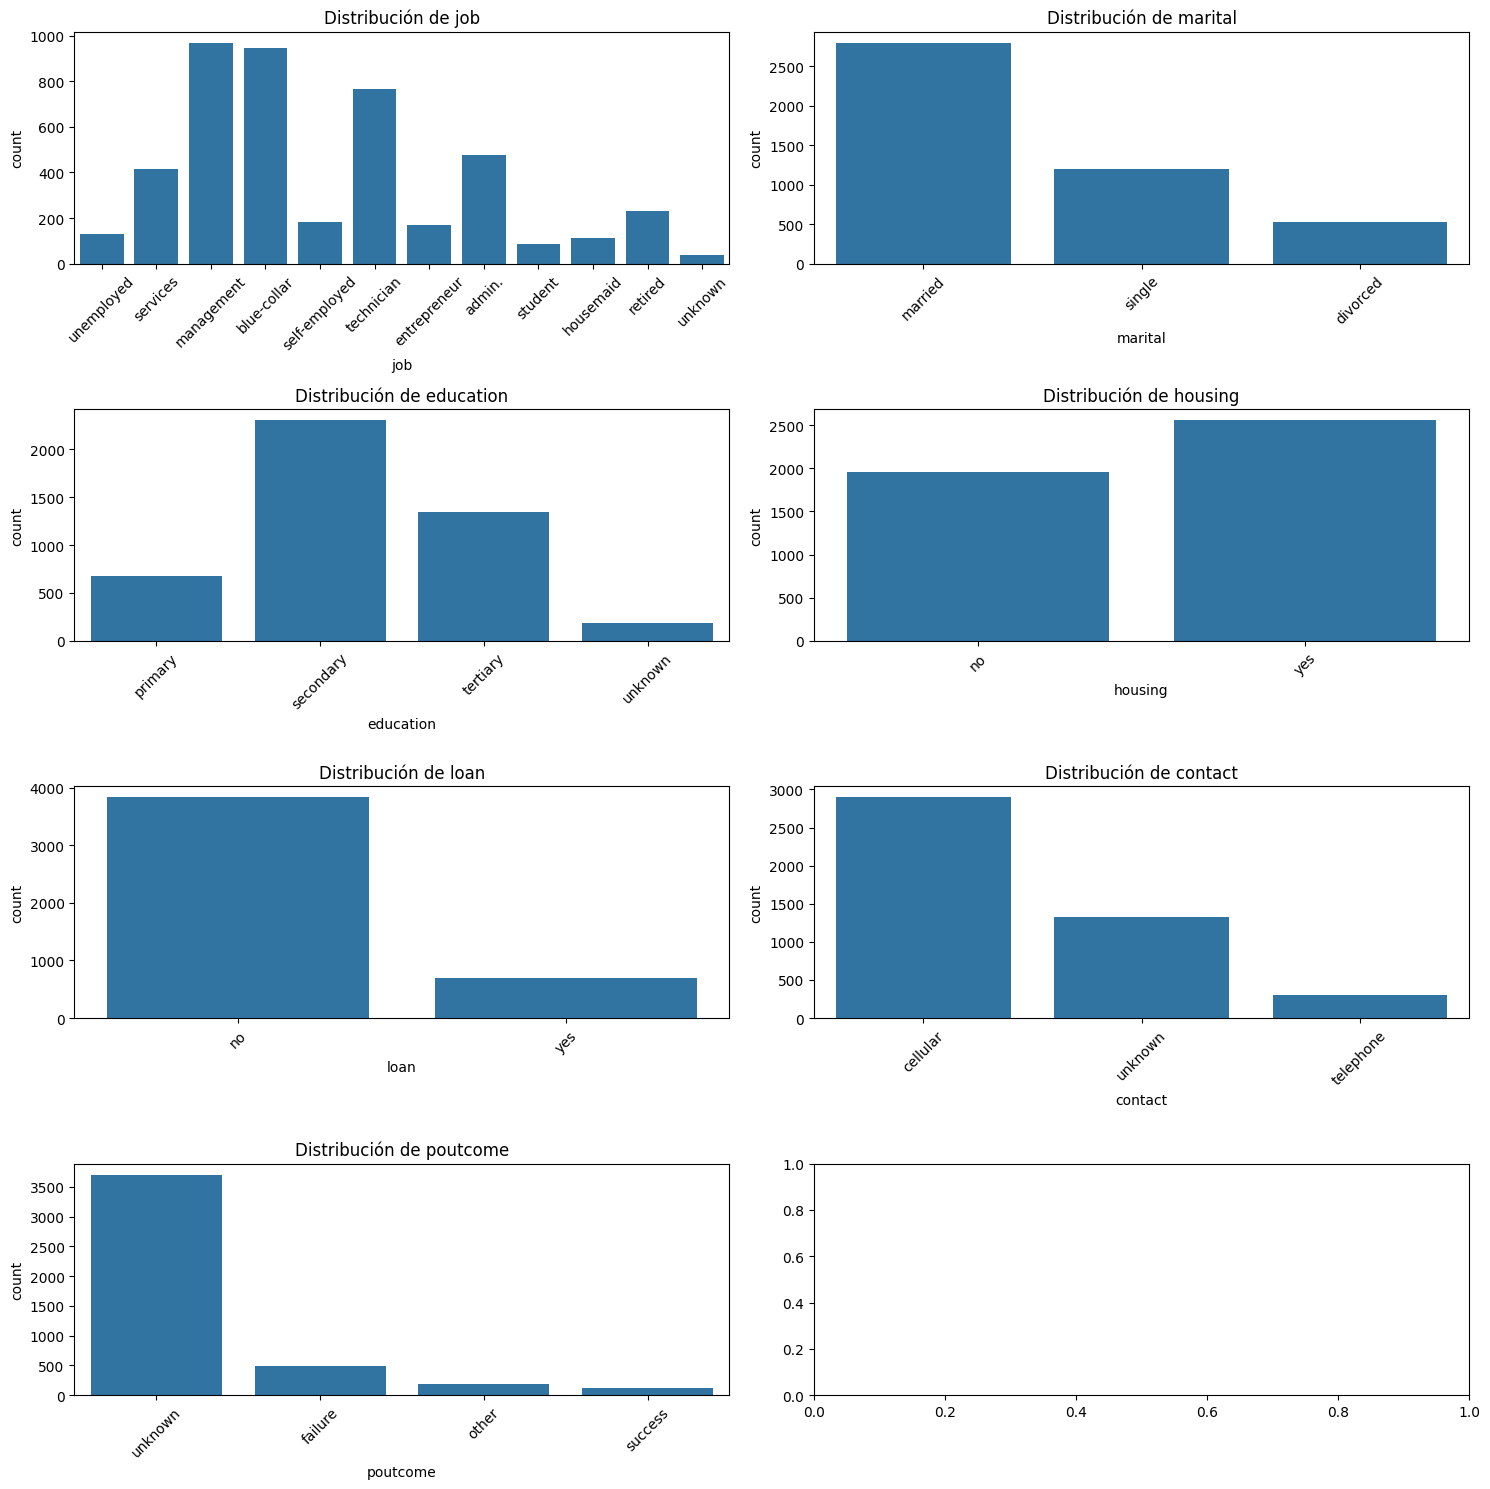

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(categorical):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 4. Preprocesamiento de Datos

Se transforman las variables categóricas en numéricas y se normalizan los datos numéricos para facilitar el proceso de agrupamiento.


In [4]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

columns_selected = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact',  'duration','campaign', 'poutcome', 'y']
df = df[columns_selected]

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled


<ipython-input-4-7b1bc78a6f5c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-4-7b1bc78a6f5c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-4-7b1bc78a6f5c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,poutcome,y
0,0.161765,0.909091,0.5,0.000000,0.068455,0.0,0.0,0.0,0.024826,0.000000,1.000000,0.0
1,0.205882,0.636364,0.5,0.333333,0.108750,1.0,1.0,0.0,0.071500,0.000000,0.000000,0.0
2,0.235294,0.363636,1.0,0.666667,0.062590,1.0,0.0,0.0,0.059914,0.000000,0.000000,0.0
3,0.161765,0.363636,0.5,0.666667,0.064281,1.0,1.0,1.0,0.064548,0.061224,1.000000,0.0
4,0.588235,0.090909,0.5,0.333333,0.044469,1.0,0.0,1.0,0.073486,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.205882,0.636364,0.5,0.333333,0.039999,1.0,0.0,0.0,0.107580,0.081633,1.000000,0.0
4517,0.558824,0.545455,0.5,0.666667,0.000000,1.0,1.0,1.0,0.049321,0.000000,1.000000,0.0
4518,0.558824,0.818182,0.5,0.333333,0.048429,0.0,0.0,0.0,0.048659,0.204082,1.000000,0.0
4519,0.132353,0.090909,0.5,0.333333,0.059731,0.0,0.0,0.0,0.041377,0.061224,0.333333,0.0


## 5. Selección del Número de Clusters

El coeficiente de Silhouette evalúa qué tan bien separados están los clusters. Un valor cercano a 1 indica una buena separación.


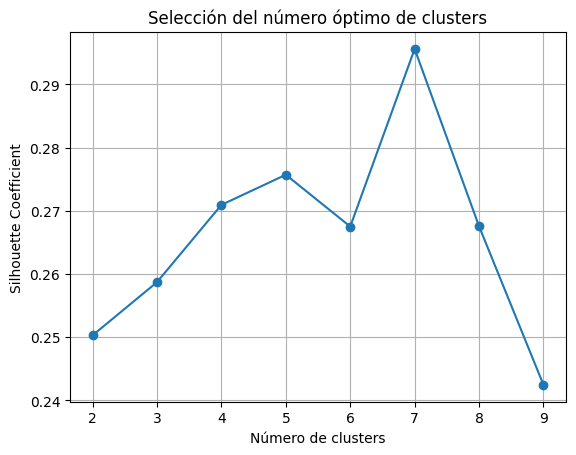

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Selección del número óptimo de clusters')
plt.grid(True)
plt.show()


## 6. Entrenamiento del Modelo KMeans


In [14]:
k_opt = 7
kmeans = KMeans(n_clusters=k_opt, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)


## 7. Reducción de Dimensionalidad con PCA


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.drop(columns='cluster'))
df_scaled['pca1'] = pca_result[:, 0]
df_scaled['pca2'] = pca_result[:, 1]


## 8. Visualización de los Clusters en 2D


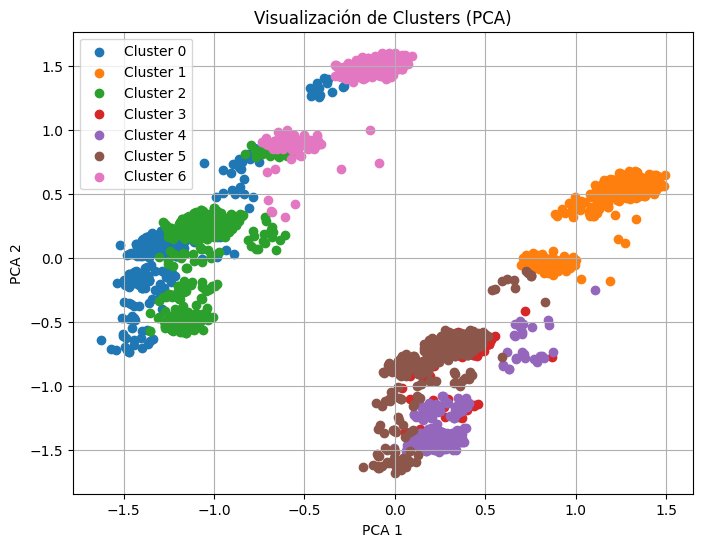

In [17]:
plt.figure(figsize=(8,6))
for cluster in sorted(df_scaled['cluster'].unique()):
    plt.scatter(df_scaled[df_scaled['cluster'] == cluster]['pca1'],
                df_scaled[df_scaled['cluster'] == cluster]['pca2'],
                label=f'Cluster {cluster}')
plt.title('Visualización de Clusters (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()


## 9. Análisis Descriptivo por Cluster

Este resumen muestra las características medias por cluster, lo que permite identificar sus diferencias más fácilmente.


In [18]:
df_temp = df.copy()
df_temp['cluster'] = df_scaled['cluster']
df_temp.groupby('cluster').mean()


,age,job,marital,education,balance,housing,loan,contact,duration,campaign,poutcome,y
cluster,,,,,,,,,,,,
0,44.611486,5.148649,1.202703,1.354730,1738.027027,0.0,0.054054,0.209459,484.770270,2.162162,2.398649,1.000000
1,39.655598,3.893738,1.094877,1.079696,1244.382353,1.0,0.154649,1.918406,262.276091,2.973435,2.987666,0.040797
2,42.254870,5.025974,1.207792,1.362013,1524.588474,0.0,0.159903,0.036526,223.808442,3.000812,2.627435,0.000000
3,38.731579,3.863158,1.094737,1.194737,1096.242105,1.0,1.000000,0.010526,265.747368,3.242105,2.773684,0.078947
4,39.555000,4.112500,1.180000,1.232500,1438.475000,1.0,0.117500,0.072500,223.295000,2.112500,0.237500,0.000000
5,39.106011,4.228415,1.161749,1.253552,1318.739891,1.0,0.006557,0.014208,293.324590,2.763934,2.809836,0.177049
6,46.329493,4.320276,1.032258,1.112903,1698.582949,0.0,0.165899,1.788018,206.230415,2.693548,2.951613,0.011521


## 10. Exportación de Resultados


In [10]:
df_export = df.copy()
df_export['cluster'] = df_scaled['cluster']
df_export.to_excel('clientes_segmentados_detallado.xlsx', index=False)


## 11. Conclusiones

El análisis de clustering permitió dividir a los clientes en 4 grupos con comportamientos y características distintas. Algunos grupos muestran una mayor propensión a contratar productos financieros. Este conocimiento se puede aplicar en estrategias de marketing más efectivas, campañas personalizadas o análisis de riesgo.

Los resultados pueden complementarse con visualizaciones interactivas en herramientas como Power BI o Tableau.
